In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore')
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (15,9)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True 

In [3]:
flight = sns.load_dataset("flights")
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## *접근1 : Lineplot으로 시각화
1. month를 기준으로 묶어 x축에는 연도, y축에는 승객 수를 시각화

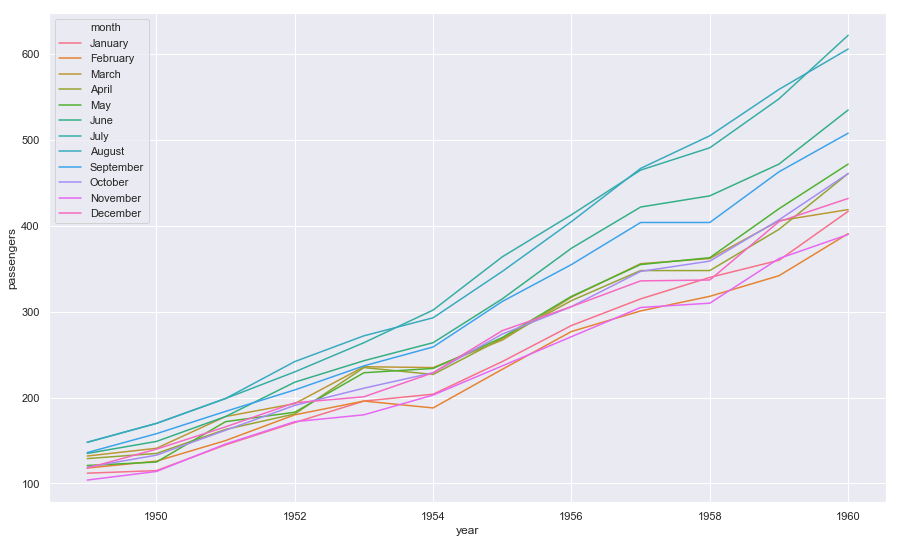

In [4]:
sns.set(style="darkgrid")

sns.lineplot(x="year", y = "passengers", hue = "month", markers = 'o', 
             dashes = True, err_style = "bars", ci=68, data = flight)

### => Insight : 모든 월에 선형적으로 증가하는 추세를 보임
- 시간이 갈수록 승객 수 증가
- 인구증가?
- 운송수단의 발달(승객 수송력 증가 등)
- 해외여행 및 비즈니스 교류 활발


## 접근2 : 승객 수 를 기준으로 다시 한 번 시각화 진행 (선형관계 내 또다른 관계가 있을 수 있으므로)

In [8]:
# Data에서 passengers 칼럼만 따로 추려낸다.
only_pass = pd.Series(flight['passengers'])
only_pass.head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

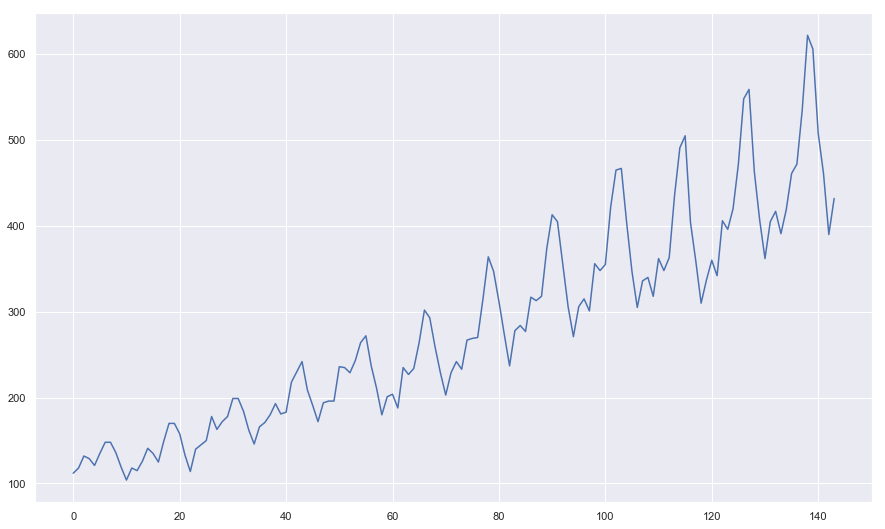

In [17]:
# 승객 수 기준 Lineplot으로 시각화
sns.lineplot(hue = "month", markers = True, dashes = True, data = only_pass)
plt.show()

### => Insight : 선형관계를 가지는 동시에 한 사이클(1년=12개월)안에서의 또 다른 패턴 확인

## 접근3 : 패턴을 하나씩 잘라 개별 비교

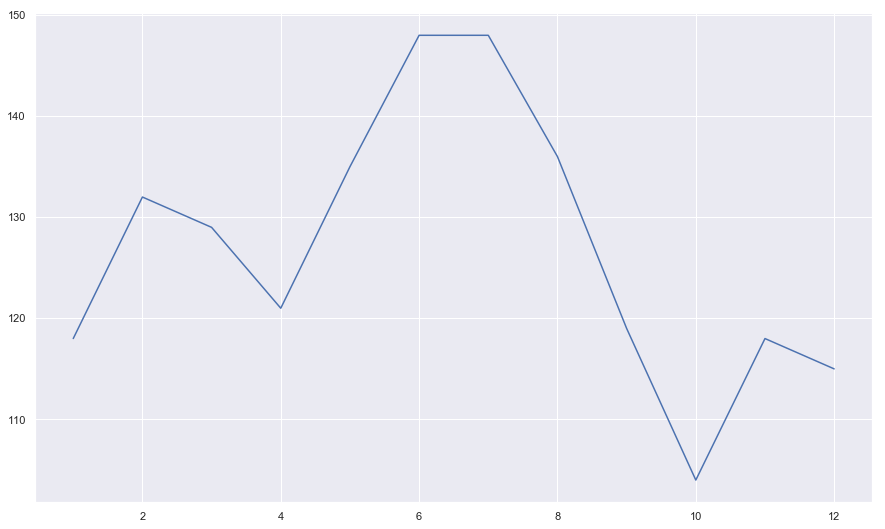

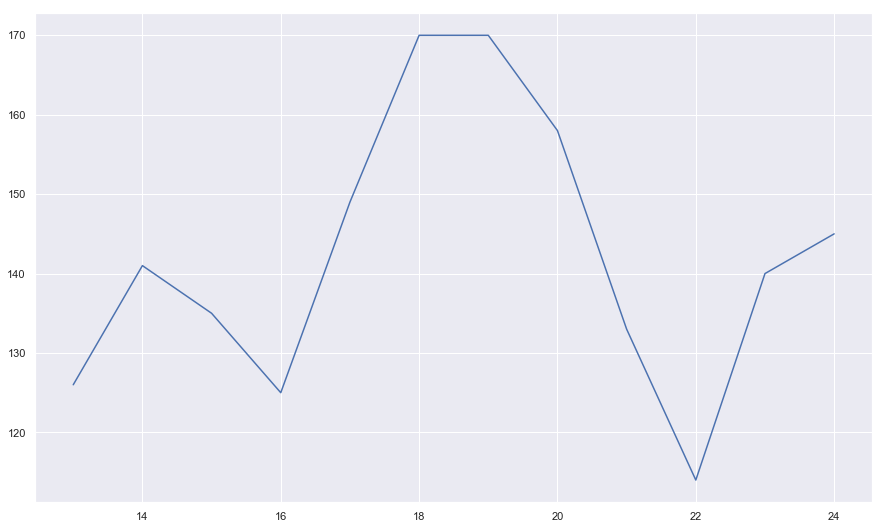

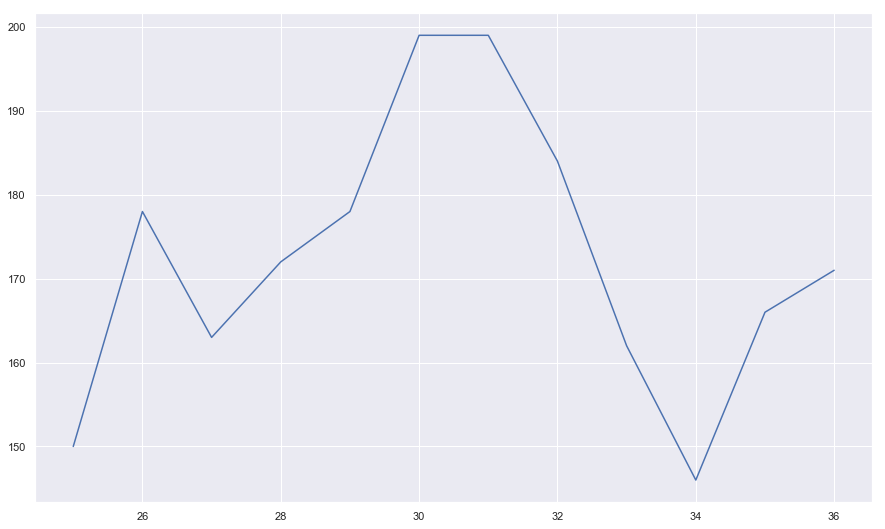

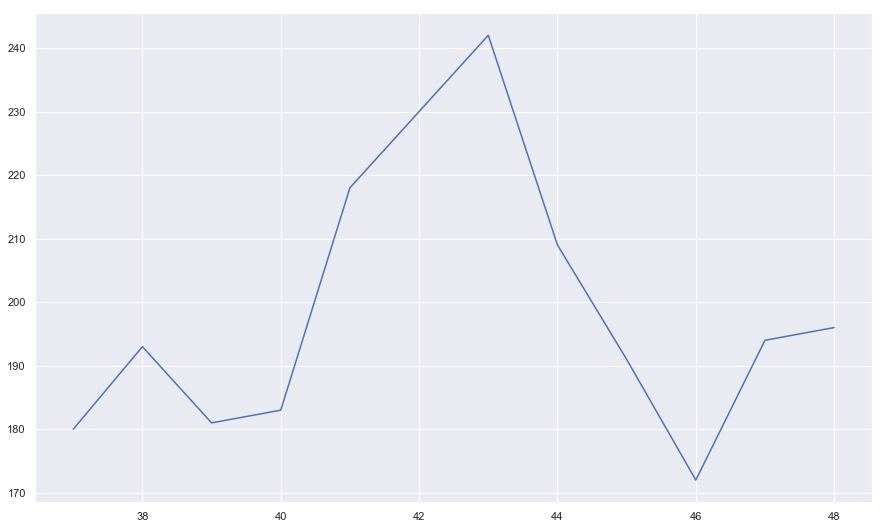

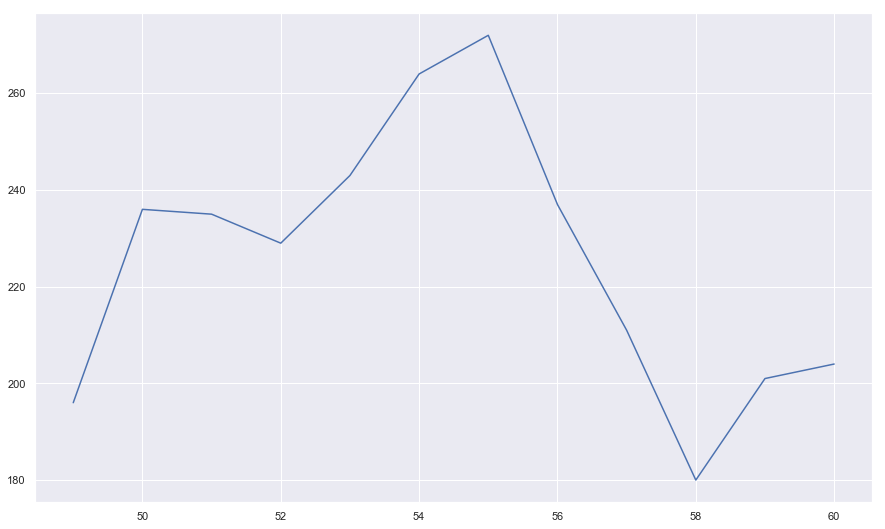

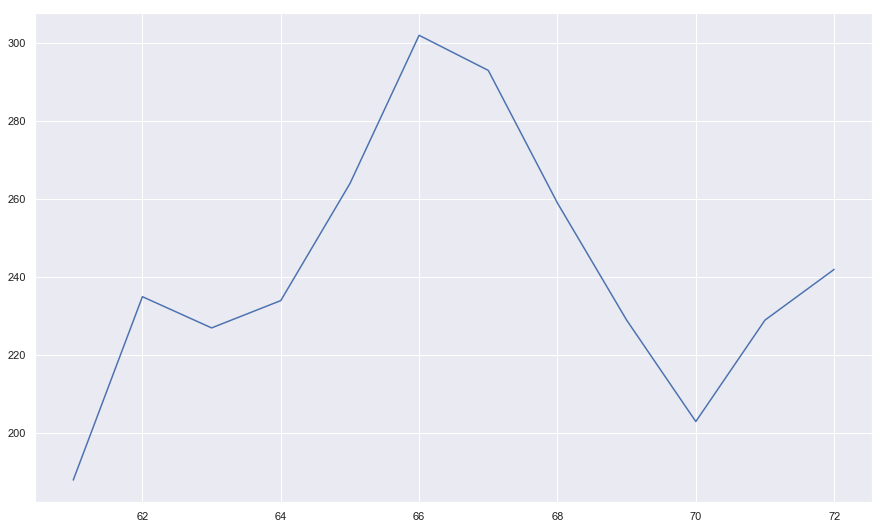

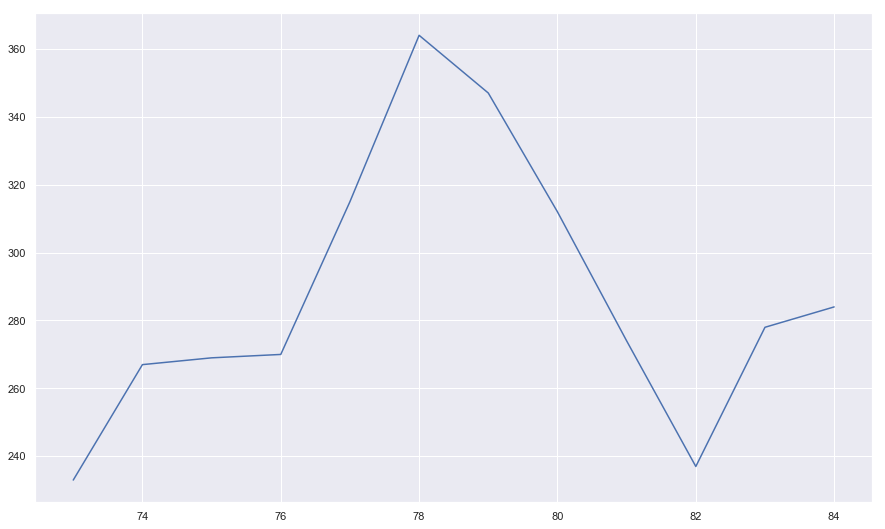

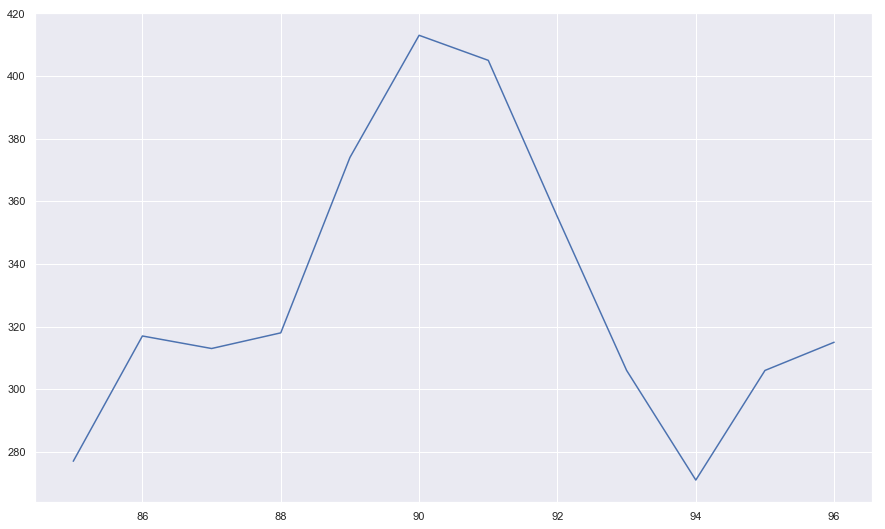

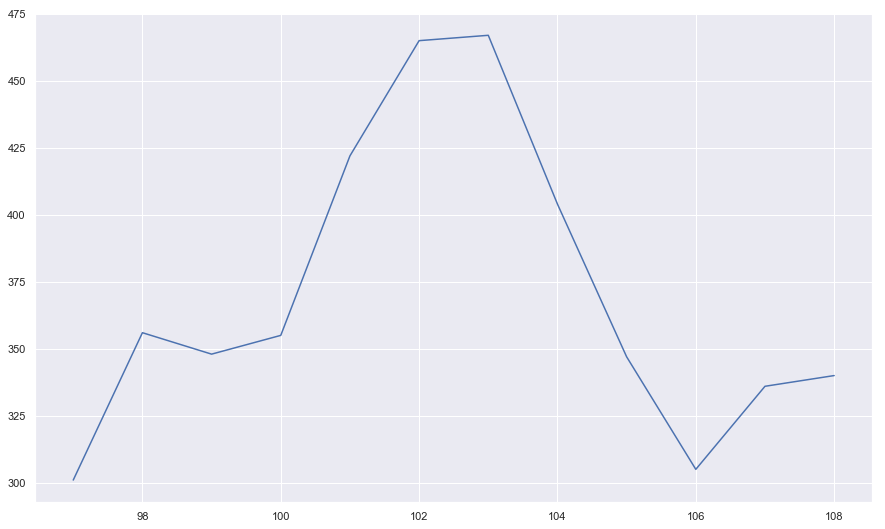

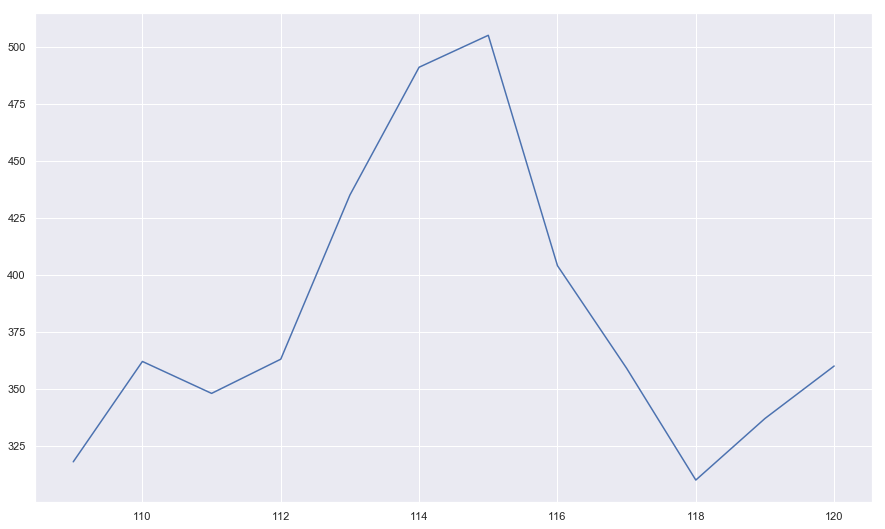

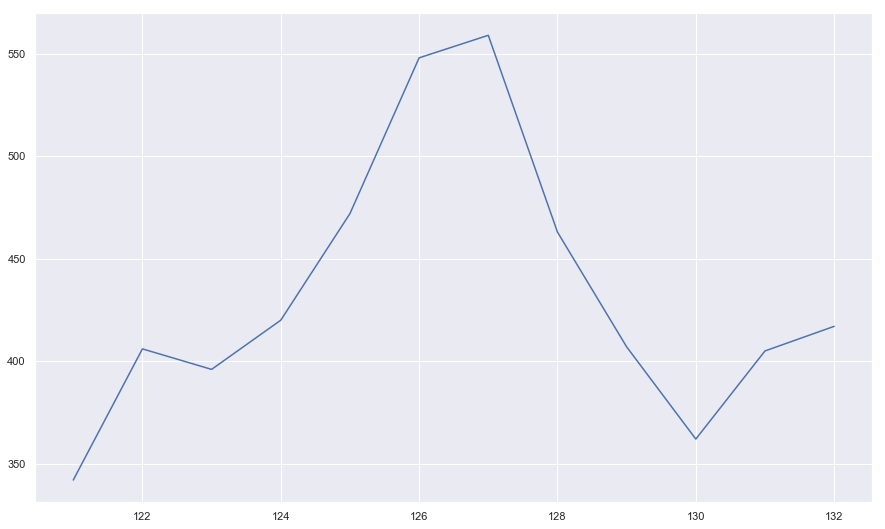

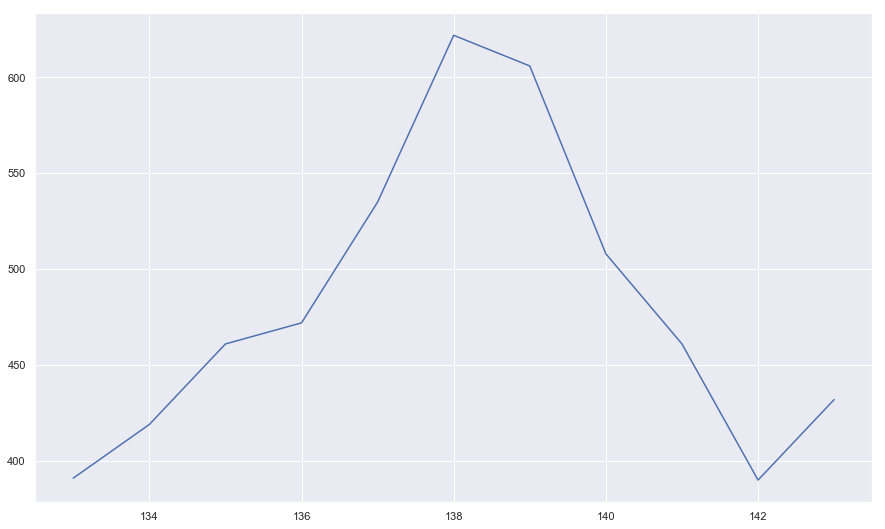

'\nfig = swarm_plot.get_figure()\nfig.savefig(...) \n'

In [14]:
for i in range(1, 144, 12):
    pattern = only_pass[i:i+12]
    fig = sns.lineplot(markers=True, dashes = True, data = pattern, size = 50, sizes=(.25, 2.5)).get_figure()
    #fig.savefig("pattern"+str(i)+".png")    저장하는 코드는 필요할 때 활성화하면 된다.
    plt.show()

## => Insight : 6월에 승객 수 최고점, 11월 승객 수 최저점, 12월 승객 수 반등하는 패턴 반복
- DataSetd은 1949년부터 1960년까지 12년간 승객 숫자를 모은 데이터
- 월별 승객숫자가 뚜렷한 패턴을 보임
- 여름 : 승객 폭발 / 겨울 : 특히 11월에 승객수 최저 찍는다.
- 여름방학 + 피서 / 겨울방학  의 이유때문일 것이라 추측
- 이 추측을 뒷받침할 또 다른 데이터가 필요